#Student Name: Martin Power
#Student ID: 9939245

## Probability Experiment

This experiment is two draw a pair of cards from a deck of 52 cards and determine what is the expected value of the pair.

From the experiment, I plan to get the probabilities of drawing all of the allowed values (e.g. 21/Blackjack) and use this to determine what value on average can be expected

In [1]:
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from numpy.linalg import eigh

In [2]:
# Class used to encapsulate a playing card for Experiment
class Card():
    
    
    def __init__(self, name = 'Ace', suit = 'Diamonds'):
        self.name = name
        self.suit = suit
        if(self.name=='Ace'):
            self.value = 1      # Ignoring ACE=10 for now
            self.face  = 0
        elif((self.name=='Jack') or (self.name=='Queen') or (self.name=='King')):
            self.value = 10
            self.face  = 1
        else:
            self.value = int(self.name)
            self.face  = 0
    
    def display_info(self):
        print(self.name, self.suit)
    
    def get_pair_value(self, other):
        if((self.name=='Ace') and (other.name=='Ace')):
            pair_value = 11
        elif(((self.name=='Ace') and (other.face==1)) or ((other.name=='Ace') and (self.face==1))):
            pair_value = 21
        else:
            pair_value = self.value + other.value
        return pair_value
    
    def get_suit_idx(self):
        if(self.suit=='Clubs'):
            suit_idx = 0
        elif(self.suit=='Spades'):
            suit_idx = 1
        elif(self.suit=='Diamonds'):
            suit_idx = 2
        else:
            suit_idx = 3
        return suit_idx
    
    def get_name_idx(self):
        if(self.name=='Ace'):
            name_idx = 0
        elif(self.name=='Jack'):
            name_idx = 10
        elif(self.name=='Queen'):
            name_idx = 11
        elif(self.name=='King'):
            name_idx = 12
        else:
            name_idx = int(self.name) - 1
        return name_idx

        
        

In [3]:
# Runnig Experiment
suits = ['Clubs', 'Spades', 'Diamonds', 'Hearts']
names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']

deck = [Card(name, suit) for name in names for suit in suits]
card1 = Card()
card2 = Card()

verbose = 0

iterations = 100000

track_suits = {'Clubs':0, 'Spades':0, 'Diamonds':0, 'Hearts':0}
track_names = {'Ace':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, 'Jack':0, 'Queen':0, 'King':0}

suit_freq = np.zeros(len(suits))
name_freq = np.zeros(len(names))
value_freq = np.zeros(iterations)
pair_freq = np.zeros(22)

for i in range(0,iterations):
    rand.shuffle(deck)
    card1, card2 = rand.sample(deck,2)
    if(verbose == 1):
        print("\nShuffle",i)
        card1.display_info()
        card2.display_info()
        print("Pair Value is ", card1.get_pair_value(card2))
    value_freq[i] = card1.get_pair_value(card2)    
    pair_freq[card1.get_pair_value(card2)]+=1
    track_suits[card1.suit]+=1
    track_suits[card2.suit]+=1
    track_names[card1.name]+=1
    track_names[card2.name]+=1
    suit_freq[card1.get_suit_idx()]+=1
    suit_freq[card2.get_suit_idx()]+=1
    name_freq[card1.get_name_idx()]+=1
    name_freq[card2.get_name_idx()]+=1

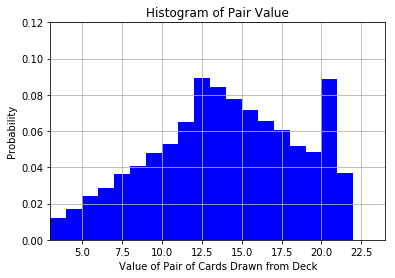


The Random Variable is the value of a pair of cards drawn at random from a deck of cards

The expected value obtained using np.average is 13.459900000000001

The expected value obtained using mean() is 13.4599

The standard deviation is  4.572691985034636


In [4]:
## Outputs and Graphs

# Discrete values that pair value can take. Used for expected variable calculation
values = [3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

# Bins used in Histogram
value_bins = [3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

# Historgram
n, bins, patches = plt.hist(value_freq, value_bins, density=True, facecolor='blue')
plt.xlabel('Value of Pair of Cards Drawn from Deck')
plt.ylabel('Probability')
plt.title('Histogram of Pair Value')
plt.axis([3, 24, 0, 0.12])
plt.grid(True)
plt.show()

print("\nThe Random Variable is the value of a pair of cards drawn at random from a deck of cards")

# Expected Value of Random Variable
# From https://nzmaths.co.nz/category/glossary/expected-value-discrete-random-variable
#     For a discrete random variable the expected value is calculated by summing the product
#     of the value of the random variable and its associated probability, taken over all of
#     the values of the random variable
# This can be calculated in numpy as follows:
expected_value = np.average(values,weights=n)
# Alteravtively, for this data, you could just get the mean of the following array
expected_value_alt = value_freq.mean()

print("\nThe expected value obtained using np.average is",expected_value)
print("\nThe expected value obtained using mean() is",expected_value_alt)


# The standard deviation can be obtained as
std_dev = value_freq.std()
print("\nThe standard deviation is ",std_dev)
